<a href="https://colab.research.google.com/github/vsathyap/PyTorch_Fundamentals/blob/main/simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial 5: Create a basic Neural Network Model**

In [167]:
import torch
#To use the neural network from torch
import torch.nn as nn
# To move our data forward
import torch.nn.functional as F

In [168]:
# Create a Model Class that inherits nn.Module (using OOPs)
class Model(nn.Module):
  '''Input Layer (it has the 4 features of the IRIS dataset)
  --> Hidden Layer 1
  --> Hidden Layer 2
  --> Output Layer (3 classes of the IRIS dataset)'''
  # Constructor of the class
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    # Instantiate our nn.Module
    super().__init__()

    #Fully connected network
    self.fc1 = nn.Linear(in_features,h1) # Input Layer --> H1
    self.fc2 = nn.Linear(h1,h2) # H1 --> H2
    self.fc3 = nn.Linear(h2,out_features) # H2 --> Output Layer

  #Function to move everything forward
  def forward(self,x):
    #Using reLu (rectified Linear Unit), f(x) = max(0,x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))

    return x


In [169]:
# To keep the random number generator deterministic
torch.manual_seed(41)

In [170]:
# Create an instance of the model
model = Model()

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
# Create an url to load our data from
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [173]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [174]:
# List the unique labels in species
my_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [175]:
# To replace the species with integers
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)

/tmp/ipython-input-3377501492.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('versicolor',1.0)


In [176]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [177]:
# Train and Test Split
X = my_df.drop('species',axis =1)
Y = my_df['species']

In [178]:
# Convert them to numpy arrays
X = X.values
Y = Y.values
print(f'X = {X}')
print(f'Y = {Y}')

X = [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

In [179]:
# To split the dataset into train and test dataset, we need scikit learn
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 41)

In [181]:
# Convert features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [182]:
# Long Tensor = 64 bit integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [183]:
# Error function to measure the prediction error
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# lower the Learning rate, longer it will take to train.

In [184]:
# Train our model
# 1 Epoch is 1 run through all the data
epochs = 100
losses = []
for i in range(epochs):
  # Process forward and predict
  y_pred = model.forward(X_train)

  # Calculate the error in prediction
  loss = criterion(y_pred,y_train)

  #Keep track of the loss per epoch
  losses.append(loss.detach().numpy())

  # Print every 10th epoch
  if i % 10==0:
    print(f"Epoch : {i}, Loss : {loss}")

  # Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch : 0, Loss : 1.1251550912857056
Epoch : 10, Loss : 1.0096259117126465
Epoch : 20, Loss : 0.8512223958969116
Epoch : 30, Loss : 0.654869019985199
Epoch : 40, Loss : 0.4490566551685333
Epoch : 50, Loss : 0.2707386612892151
Epoch : 60, Loss : 0.15461841225624084
Epoch : 70, Loss : 0.09299226105213165
Epoch : 80, Loss : 0.06447025388479233
Epoch : 90, Loss : 0.050585027784109116


Text(0.5, 0, 'Epochs')

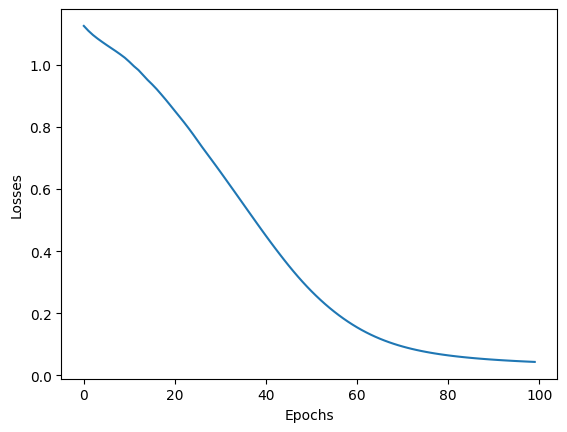

In [185]:
# Plot the loss across epochs
plt.plot(range(epochs),losses)
plt.ylabel('Losses')
plt.xlabel('Epochs')
